# Downloading data from kaggle

Check out this [link](https://www.youtube.com/watch?v=yEXkEUqK52Q) to understand how to use kaggle datasets in google colab.

In [1]:
from google.colab import drive
import os
import shutil
import json

os.system("pip install kaggle")

kaggle_key_path = "/content"
dataset_path = "/content/data/"

with open(os.path.join(kaggle_key_path, "kaggle.json"), "r") as f:
    data = json.load(f)
    os.environ["KAGGLE_USERNAME"] = data["username"]
    os.environ["KAGGLE_KEY"] = data["key"]
    del data

import kaggle

kaggle.api.authenticate()

kaggle.api.dataset_download_files(
    "carlosrunner/pizza-not-pizza",
    path=dataset_path,
    unzip=True
)

# Importing necessary modules

In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mimage
import random

import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow import keras

In [3]:
plt.style.use( 'seaborn-v0_8-dark') # Picking a style of graph to use.

tf.random.set_seed(39)
np.random.seed(39)

# Loading the data

In [4]:
pizza_path = "/content/data/pizza_not_pizza/pizza"
not_pizza_path = "/content/data/pizza_not_pizza/not_pizza"

In [5]:
pizza_path_list = os.listdir(pizza_path)
not_pizza_path_list = os.listdir(not_pizza_path)

In [6]:
# It is a balanced dataset

print("No of pizza images: ", len(pizza_path_list))
print("No of non-pizza images: ", len(not_pizza_path_list))

No of pizza images:  983
No of non-pizza images:  983


Colored Image representation in computers

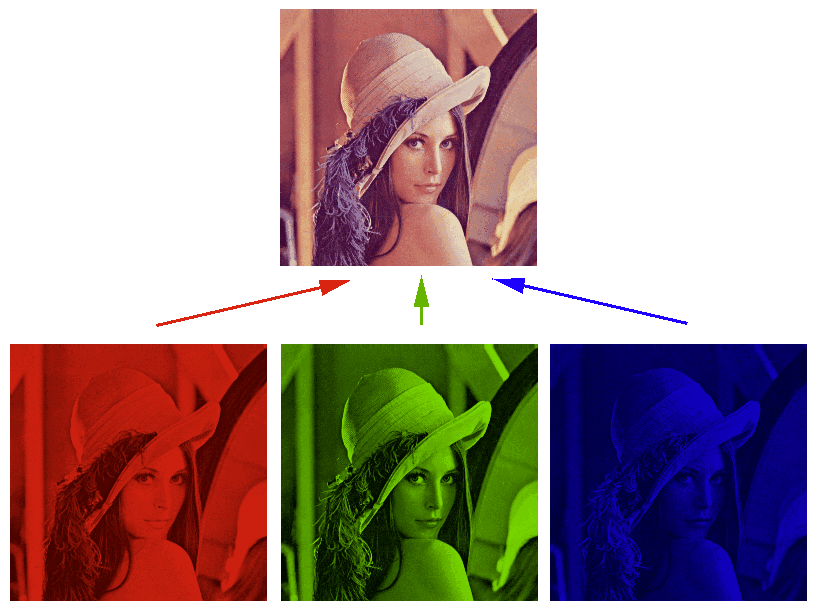

In [7]:
image = mimage.imread("/content/data/pizza_not_pizza/not_pizza/1018802.jpg")
image.shape

(512, 512, 3)

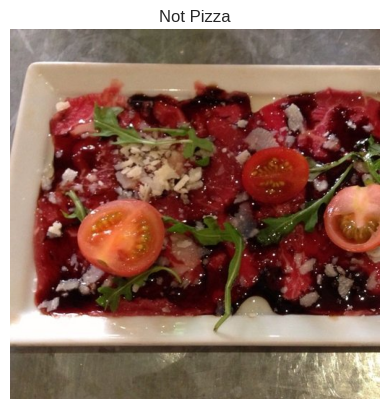

In [8]:
random_index = random.randint(0, 983)
if random.randint(0, 2) == 0:
    image_path = os.path.join(pizza_path , pizza_path_list[random_index])
    label = "Pizza"
else:
    image_path = os.path.join(not_pizza_path, not_pizza_path_list[random_index])
    label = "Not Pizza"
image = mimage.imread(image_path)
plt.imshow(image)
plt.title(label)
plt.axis(False)
plt.show()

In [9]:
# Loading the images as a tensorflow dataset object.

train_data = image_dataset_from_directory(
    "/content/data/pizza_not_pizza",
    labels="inferred",
    label_mode="binary",
    class_names=["not_pizza", "pizza"],
    batch_size=32,
    image_size=(224, 224),
    validation_split=0.2,
    subset="training",
    seed=139
)

valid_data = image_dataset_from_directory(
    "/content/data/pizza_not_pizza",
    labels="inferred",
    label_mode="binary",
    class_names=["not_pizza", "pizza"],
    batch_size=32,
    image_size=(224, 224),
    validation_split=0.2,
    shuffle=False,
    subset="validation",
    seed=139
)

Found 1966 files belonging to 2 classes.
Using 1573 files for training.
Found 1966 files belonging to 2 classes.
Using 393 files for validation.


In [10]:
type(train_data)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [11]:
next(train_data.as_numpy_iterator())[1][0]

array([1.], dtype=float32)

In [12]:
train_data.cardinality()

<tf.Tensor: shape=(), dtype=int64, numpy=50>

In [13]:
valid_data.cardinality()

<tf.Tensor: shape=(), dtype=int64, numpy=13>

In [14]:
def rescale(X, y):
    return (X/255.0, y)

train_data = train_data.map(rescale)
valid_data = valid_data.map(rescale)

# Creating the model

In [15]:
tf.keras.layers.Conv2D?

Convolution operation

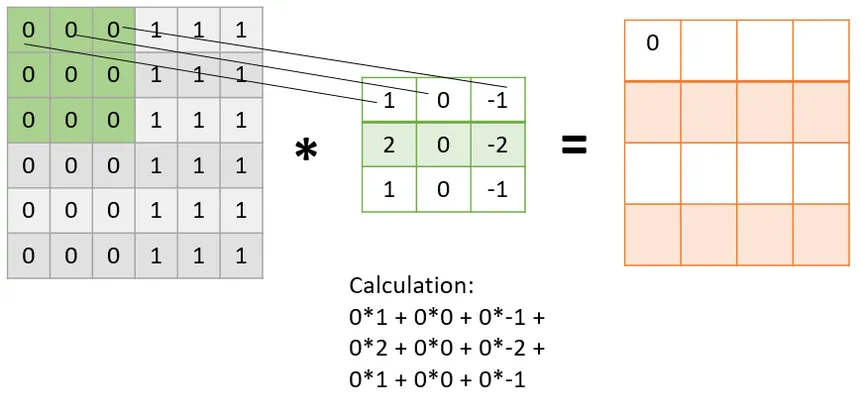

CNN

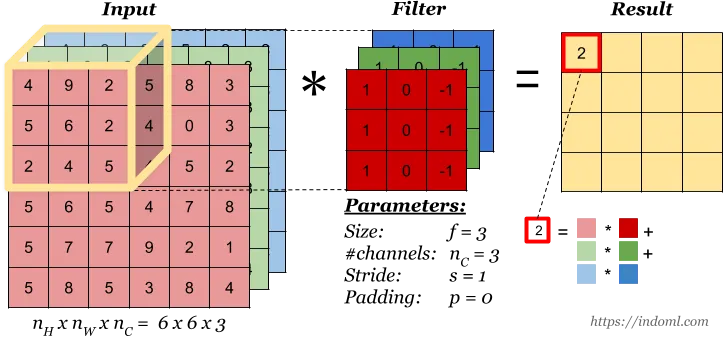

In [16]:
model = Sequential([
    Conv2D(16, (3, 3), activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Dropout(0.2),
    Conv2D(16, (3, 3), activation="relu"),
    MaxPool2D(),
    Dropout(0.2),
    Conv2D(16, (3, 3), activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dropout(0.2),
    Dense(512, activation="relu"),
    Dropout(0.2),
    Dense(1, activation="sigmoid")
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 16)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 111, 111, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 16)      2320      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 16)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 54, 54, 16)        0

# Training the model

In [18]:
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [19]:
history = model.fit(
    train_data,
    epochs=20,
    verbose=1,
    validation_data=valid_data
).history

Epoch 1/20
50/50 [==============================] - 12s 131ms/step - loss: 0.8197 - accuracy: 0.5524 - val_loss: 0.7134 - val_accuracy: 0.1807
Epoch 2/20
50/50 [==============================] - 8s 146ms/step - loss: 0.6493 - accuracy: 0.6275 - val_loss: 0.6708 - val_accuracy: 0.6260
Epoch 3/20
50/50 [==============================] - 8s 136ms/step - loss: 0.6210 - accuracy: 0.6662 - val_loss: 0.5231 - val_accuracy: 0.8982
Epoch 4/20
50/50 [==============================] - 5s 97ms/step - loss: 0.6017 - accuracy: 0.6758 - val_loss: 0.8027 - val_accuracy: 0.2672
Epoch 5/20
50/50 [==============================] - 4s 82ms/step - loss: 0.5611 - accuracy: 0.7107 - val_loss: 0.7725 - val_accuracy: 0.4682
Epoch 6/20
50/50 [==============================] - 4s 69ms/step - loss: 0.5272 - accuracy: 0.7495 - val_loss: 0.6772 - val_accuracy: 0.5598
Epoch 7/20
50/50 [==============================] - 5s 96ms/step - loss: 0.4938 - accuracy: 0.7711 - val_loss: 0.4834 - val_accuracy: 0.7735
Epoch 8/2

Overfitting and underfitting in loss curve.

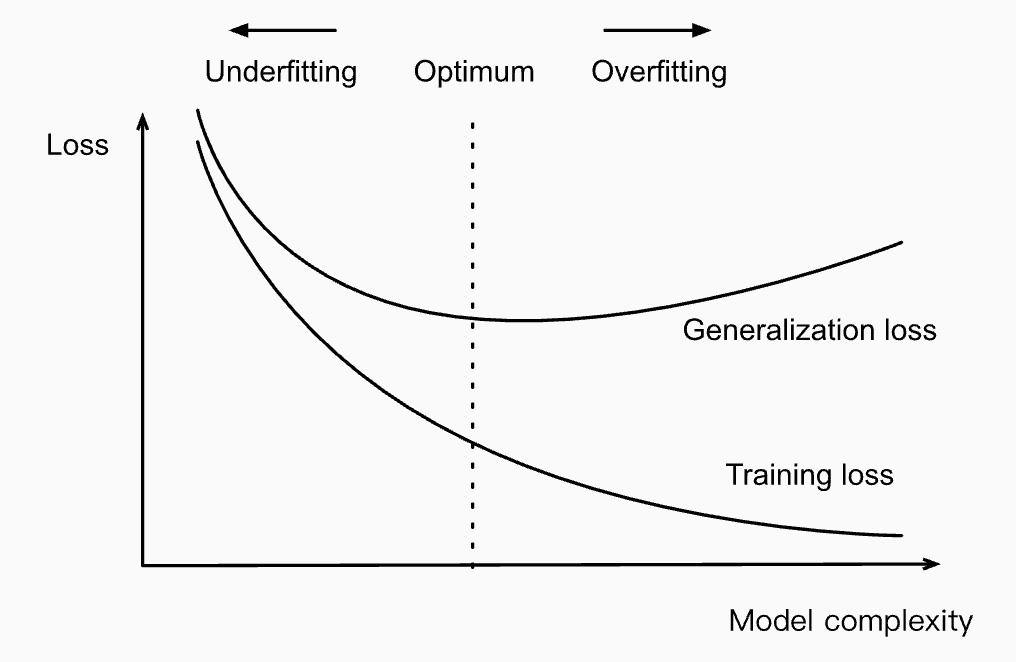

Loss graph

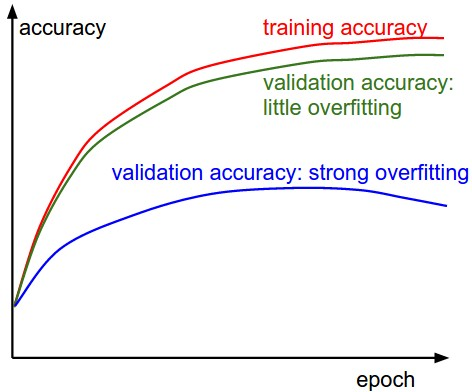

# Visualizing the results

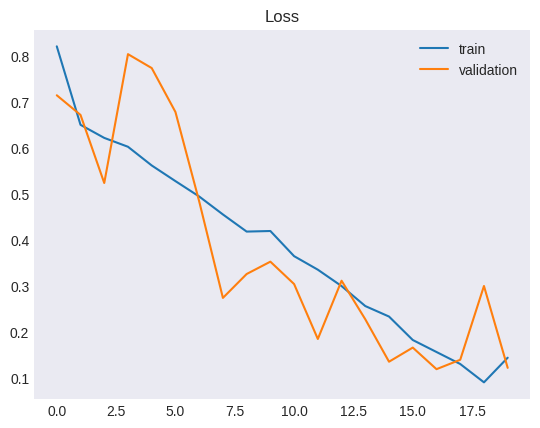

In [20]:
plt.plot(history["loss"], label="train")
plt.plot(history["val_loss"], label="validation")
plt.title("Loss")
plt.legend()
plt.show()

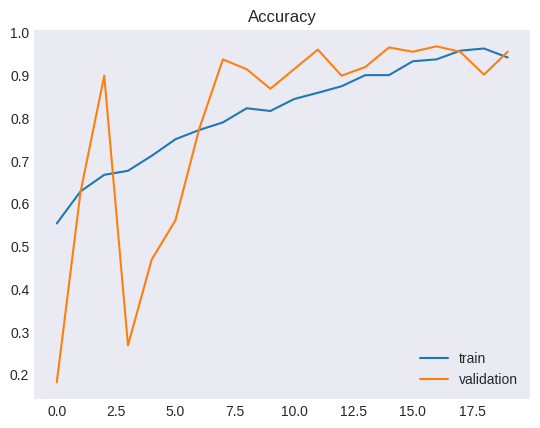

In [21]:
plt.plot(history["accuracy"], label="train")
plt.plot(history["val_accuracy"], label="validation")
plt.title("Accuracy")
plt.legend()
plt.show()

1/1 [==============================] - 0s 329ms/step
1.000000


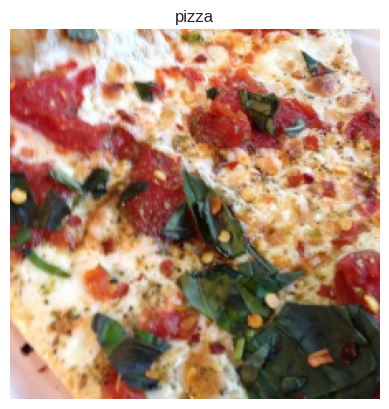

In [22]:
import cv2

img = cv2.imread("/content/data/pizza_not_pizza/pizza/1106738.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224, 224))

prediction = model.predict(np.expand_dims(img, 0))[0][0]
print(f"{prediction:f}")

plt.imshow(img)
plt.axis(False)
plt.title("not pizza" if prediction < 0.5 else "pizza")
plt.show()